In [1]:
%run ../startup.py

INFO:root:/home/stites/git/combinators appended to python path
INFO:root:%load_ext autoreload
INFO:root:%autoreload 2
INFO:root:from IPython.core.debugger import set_trace
INFO:root:from IPython.core.display import display, HTML
INFO:root:import torch
INFO:root:import numpy as np
INFO:root:import scipy as sp
INFO:root:import matplotlib
INFO:root:import matplotlib.pyplot as plt
INFO:root:%matplotlib inline
INFO:root:import seaborn as sns
INFO:root:import pandas as pd


In [60]:
import torch
from dataset import GMM
import combinators.trace.utils as trace_utils
import combinators.tensor.utils as tensor_utils
import math

degrees = lambda angle: [math.cos(angle), math.sin(angle)]
locs=torch.tensor([degrees(a*math.pi/180) for a in [0, 45, 90, 135, 180, 225, 270, 315]]) * 10
program = GMM(locs=locs, covs=[torch.eye(2) for _ in range(len(locs))], name="gmm")
tr, (xs8, zs) = program(sample_shape=(1000,))

for k, rv in tr.items():
    print('{:>11}: {}'.format(k, tensor_utils.show(rv.value)))

print()
print(zs[:10])
print(xs8[:10])

assignments: int64[1000]#7vj3Mpqv
        g_0: float32[126×2]#coF9sRa5
        g_1: float32[111×2]#OBVq6JRR
        g_2: float32[135×2]#JO5o3GoC
        g_3: float32[133×2]#nWdaIkM3
        g_4: float32[116×2]#_w6cSJsd
        g_5: float32[118×2]#MHi9y4Ah
        g_6: float32[134×2]#YdgvbJw3
        g_7: float32[127×2]#G0ru5JPx

tensor([5, 0, 1, 3, 6, 7, 4, 0, 1, 2])
tensor([[  7.3684,   6.7492],
        [ -0.1019, -10.4977],
        [ -9.8483,   6.2647],
        [ 10.0654,   0.1881],
        [ -7.9344,   6.8352],
        [  0.8904,  11.2891],
        [ 10.7129,  -0.9387],
        [ -7.5988,   7.4764],
        [  0.9063,  -9.8046],
        [ -6.7015,   5.9243]])


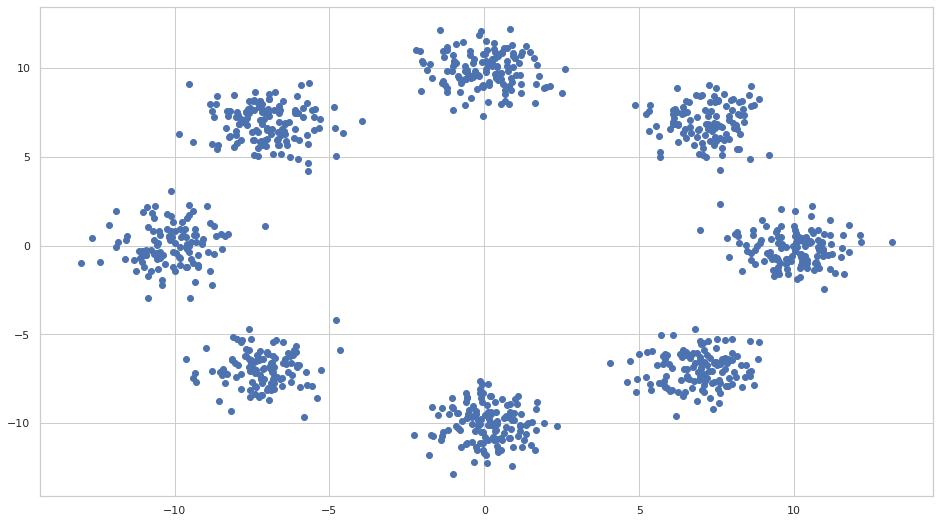

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

from matplotlib import colors
from scipy.interpolate import interpn
from matplotlib import cm

c='C0'
cm_endpoints = [(0., (*colors.to_rgb(c), 0.)),
                (1., (*colors.to_rgb(c), 1.))]
lin_alpha = colors.LinearSegmentedColormap.from_list('incr_alpha', cm_endpoints)

fig, ax = plt.subplots()
ax.scatter(xs8[:,0], xs8[:,1], cmap=lin_alpha)
plt.show()

In [62]:
from dataset import RingGMM
import visualize
ring_gmm = RingGMM(scale=20, count=13)

tr13, (xs13, zs) = ring_gmm(sample_shape=(10000,))


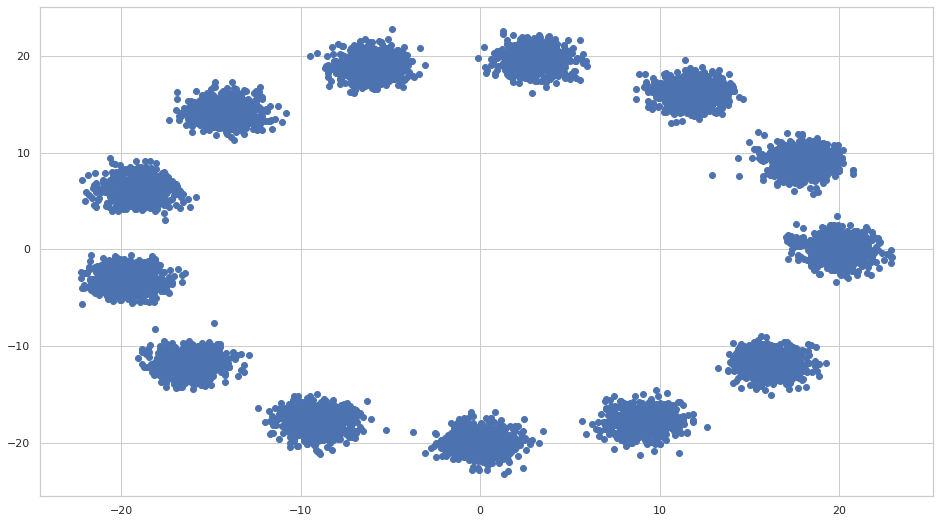

In [63]:
import matplotlib.gridspec as gridspec

visualize.scatter(xs13)

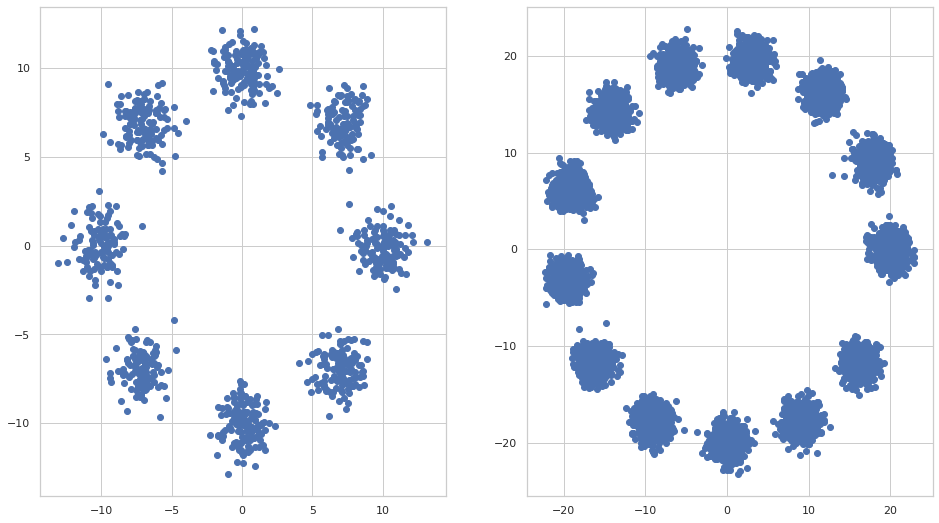

In [64]:
fig = plt.figure()
gspec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax0 = fig.add_subplot(gspec[0, 0])
visualize.scatter(xs8, ax=ax0)
ax1 = fig.add_subplot(gspec[0, 1])

visualize.scatter(xs13, ax=ax1)


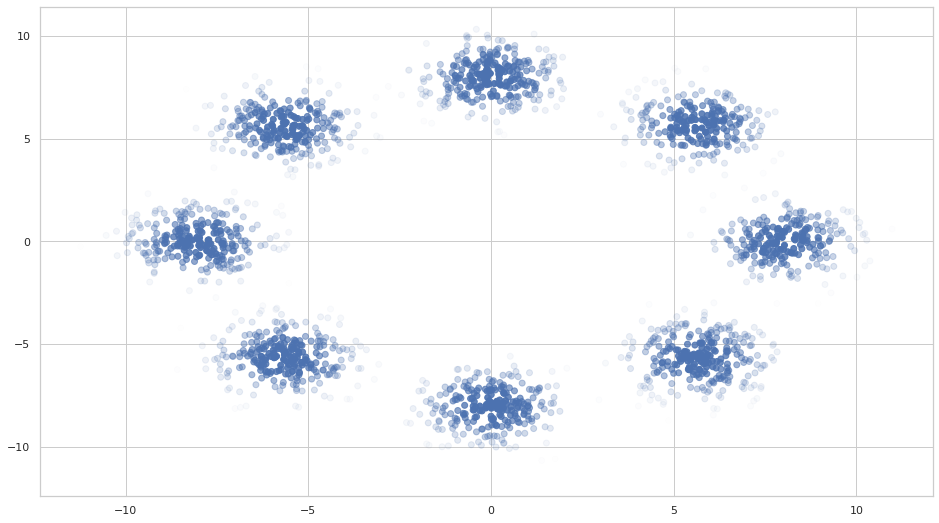

In [82]:
ring_gmm = RingGMM(scale=8, count=8)

tr, (xs, zs, ixs) = ring_gmm(sample_shape=(2000,), with_indicies=True)

log_probs = ring_gmm.log_probs(tr, ixs)

visualize.scatter(xs, lws=log_probs)